In [2]:
import util

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import scipy.ndimage
import scipy.stats

%matplotlib tk

In [17]:
data = np.load('/reg/d/psdm/amo/amo86615/res/haoyuan/alignment/input/normalized_sample_2.npy')
data[data<1e-6] = 0
data[data>0.01] = 0.01

In [18]:
data_copy = data[63-left:63+right, 63-left:63+right,  63-left:63+right]

np.save('/reg/d/psdm/amo/amo86615/res/haoyuan/alignment/input/chop_category_2.npy',data_copy)

# Cut out the small region where there are some data

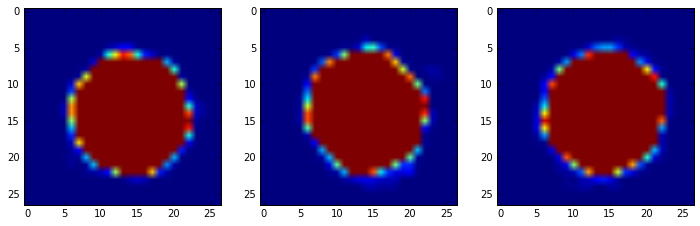

In [19]:
left = 13
right = 14

data_copy = data[63-left:63+right, 63-left:63+right,  63-left:63+right]

fig, axes  =plt.subplots(ncols=3, nrows=1)

fig.set_figwidth(12)

axes[0].imshow(np.sum(data_copy, axis=0), vmax=0.01, cmap='jet')
axes[1].imshow(np.sum(data_copy, axis=1), vmax=0.01, cmap='jet')
axes[2].imshow(np.sum(data_copy, axis=2), vmax=0.01, cmap='jet')

plt.show()

In [7]:
print(data_copy.shape)

(27, 27, 27)


In [8]:
# Move to the mass center
center = util.get_mass_center(data_copy)
print(center)

[ 13.88427979  13.95767285  14.20344657]


In [15]:
# Calculate the affine map to use scipy.ndimage.affine_transform
rotation_matrix = scipy.stats.special_ortho_group.rvs(3)
offset = center - rotation_matrix.dot(center)

# Rotate the sample space
rotated = scipy.ndimage.affine_transform(input=data_copy,
                               matrix=rotation_matrix,
                               offset=offset,
                               output_shape=(27, 27, 27),
                               output=None,
                               order=1,
                               mode='constant', cval=0.0, prefilter=True)

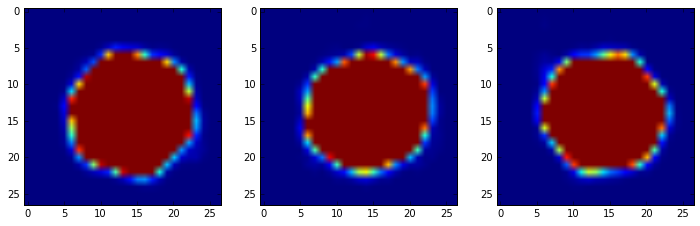

In [16]:
fig, axes  =plt.subplots(ncols=3, nrows=1)

fig.set_figwidth(12)


axes[0].imshow(np.sum(rotated, axis=0), vmax=0.01, cmap='jet')
axes[1].imshow(np.sum(rotated, axis=1), vmax=0.01, cmap='jet')
axes[2].imshow(np.sum(rotated, axis=2), vmax=0.01, cmap='jet')

plt.show()